<b>Importing all the necessary libraries for the analysis</b>

In [1]:
# For loading the dataset
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For imputation in dataset
from sklearn.impute import SimpleImputer
import numpy as np

# For dealing with categorical Data
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# For normal distribution
from scipy.stats import norm

# For measuring performance and data processing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# For handling class imbalances
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

<b>Loading the Adult Census Dataset</b>

In [2]:
df = pd.read_csv("adult-census-income.csv")

<b>Identify the type of attributes within the dataset</b>

<table>
  <thead>
    <tr>
      <th>Attribute</th>
      <th>Type</th>
      <th>Attribute</th>
      <th>Type</th>
      <th>Attribute</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>age</td>
      <td>Discrete Numerical</td>
      <td>race</td>
      <td>Discrete Nominal</td>
      <td>education</td>
      <td>Discrete Ordinal</td>
    </tr>
    <tr>
      <td>workclass</td>
      <td>Discrete Nominal</td>
      <td>sex</td>
      <td>Discrete Binary</td>
      <td>capital.gain</td>
      <td>Discrete Numerical</td>
    </tr>
    <tr>
      <td>fnlwgt</td>
      <td>Discrete Numerical</td>
      <td>capital.loss</td>
      <td>Discrete Numerical</td>
      <td>education.num</td>
      <td>Discrete Ordinal</td>
    </tr>
    <tr>
      <td>marital.status</td>
      <td>Discrete Nominal</td>
      <td>hours.per.week</td>
      <td>Discrete Numerical</td>
      <td>native.country</td>
      <td>Discrete Nominal</td>
    </tr>
    <tr>
      <td>occupation</td>
      <td>Discrete Nominal</td>
      <td>income</td>
      <td>Discrete Binary</td>
      <td>relationship</td>
      <td>Discrete Nominal</td>
    </tr>
  </tbody>
</table>


<b>Data Descriptive Characteristics</b>

In [3]:
# 1. Find the number of data points and attributes within the dataset
num_data_points, num_attributes = df.shape
print("Number of data points within the dataset: " + str(num_data_points))
print("Number of attributes within the dataset: " + str(num_attributes))
print("---------------------------------")

# 2. Find the data types of each attribute within the dataset
print(df.dtypes)
print("---------------------------------")

# 3. Find the descriptive characterstics of the numerical attributes in the dataset
print(df.describe())
print("---------------------------------")


Number of data points within the dataset: 32561
Number of attributes within the dataset: 15
---------------------------------
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
---------------------------------
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000   

<b>Handling Missing Values in the dataset</b>

In [4]:
# Since dataset is containing "?" for missing values, explicitly adding them as null
df.replace("?", np.nan, inplace=True)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Before filling the missing values")
print(missing_values)
print("---------------------------")

# Filling up missing data on education
occupation_grouped_education = df.groupby("education")["occupation"].apply(lambda wc: wc.mode()[0])
occupation_education_mapping = occupation_grouped_education.to_dict()
df["occupation"] = df["occupation"].fillna(df["education"].map(occupation_education_mapping))

workclass_grouped_education = df.groupby("education")["workclass"].apply(lambda wc: wc.mode()[0])
workclass_education_mapping = workclass_grouped_education.to_dict()
df["workclass"] = df["workclass"].fillna(df["education"].map(workclass_education_mapping))

# Filling up the missing data with most frequent value for "native.country"
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df["native.country"] = impute.fit_transform(df[["native.country"]]).ravel()

missing_values = df.isnull().sum()
print("After filling the missing values")
print(missing_values)
print("---------------------------")

Before filling the missing values
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
---------------------------
After filling the missing values
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
---------------------------


<b>Handling duplicates within the dataset</b>

In [5]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows within the dataset before removal: " + str(duplicate_rows.shape[0]))

df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows within the dataset after removal: " + str(duplicate_rows.shape[0]))


Number of duplicate rows within the dataset before removal: 24
Number of duplicate rows within the dataset after removal: 0


<b>Handling the Categorical Data (encoding to numerical format)</b>

In [ ]:
# For ordinal data, use ordinal encoding
ord_encoder = OrdinalEncoder()
df["education"] = ord_encoder.fit_transform(df[["education"]])

# For Binary data, simply use python dictionary mapping
income_mapping = {"<=50K": 0, ">50K": 1}
df["income"] = df["income"].map(income_mapping)

sex_mapping = {"Female": 0, "Male": 1}
df["sex"] = df["sex"].map(sex_mapping)

# For rest of the categorical data, use label encoding
encoding_columns = ["workclass", "marital.status", "occupation", "relationship", "race", "native.country"]
le = LabelEncoder()
for column in encoding_columns:
    df[column] = le.fit_transform(df[column])

<b>Handling the outliers within the dataset</b>

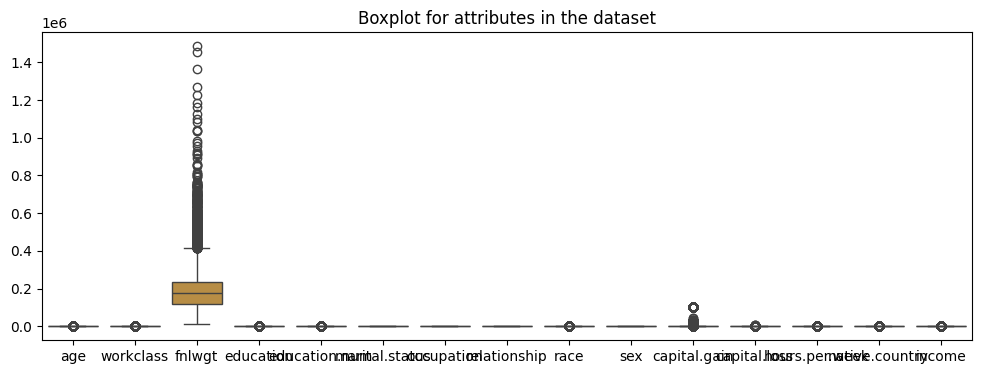

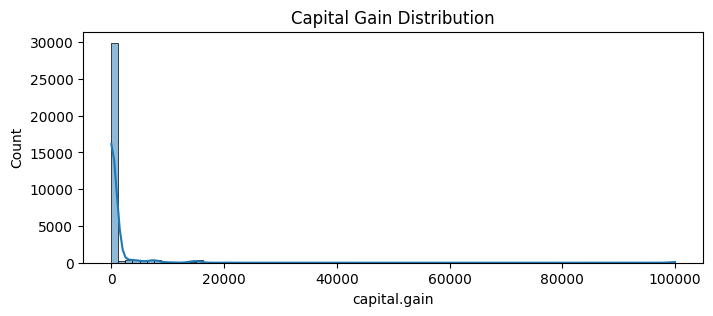

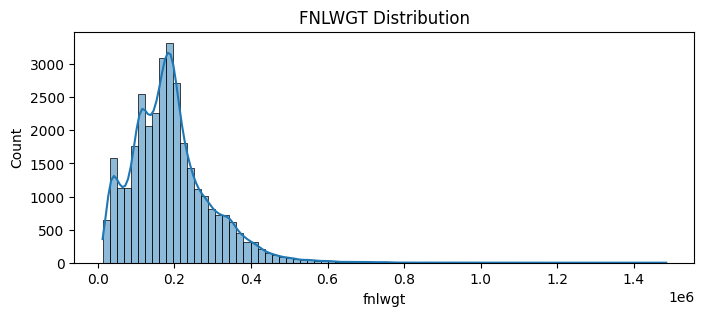

In [7]:
# Outliers can be detected by plotting boxplots for each feature
plt.figure(figsize=(12, 4))
sns.boxplot(data=df)
plt.title("Boxplot for attributes in the dataset")
plt.show()

# Finding data outliers by plotting distribution of "capital.gain"
plt.figure(figsize=(8, 3))
sns.histplot(x="capital.gain", data=df, kde=True, bins=80)
plt.title("Capital Gain Distribution")
plt.show()

# Finding data outliers by plotting distribution of "fnlwgt"
plt.figure(figsize=(8, 3))
sns.histplot(x="fnlwgt", data=df, kde=True, bins=80)
plt.title("FNLWGT Distribution")
plt.show()

In [8]:
# Check if there is any impact on performance if we remove outliers for feature "capital.gain" from the dataset
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Before removing outliers for feature capital.gain")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("-----------------------------------------------------------------------")

df_removed_outliers = df[df["capital.gain"] <= 30000]
X = df_removed_outliers.drop("income", axis=1)
y = df_removed_outliers["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("After removing outliers for feature capital.gain")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Before removing outliers for feature capital.gain
Accuracy Score:  0.8589428395820529
Recall Score:  0.6440789473684211
Precision Score:  0.721976401179941
F1 Score:  0.6808066759388038
-----------------------------------------------------------------------
After removing outliers for feature capital.gain
Accuracy Score:  0.8503474903474904
Recall Score:  0.6047120418848168
Precision Score:  0.7168347556245152
F1 Score:  0.6560170394036209


In [9]:
# Check if there is any impact on performance if we remove outliers for feature "fnlwgt" from the dataset
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report before removing outliers for feature fnlwgt")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("-----------------------------------------------------------------------")

df_removed_outliers = df[df["fnlwgt"] <= 0.9*1e6]
X = df_removed_outliers.drop("income", axis=1)
y = df_removed_outliers["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report after removing outliers for feature fnlwgt")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Classification Report before removing outliers for feature fnlwgt
Accuracy Score:  0.8578672403196066
Recall Score:  0.6375
Precision Score:  0.7215189873417721
F1 Score:  0.6769123297240657
-----------------------------------------------------------------------
Classification Report after removing outliers for feature fnlwgt
Accuracy Score:  0.863929889298893
Recall Score:  0.6429980276134122
Precision Score:  0.740909090909091
F1 Score:  0.6884899683210137


In [10]:
# Remove the "fnlwgt" outliers from the dataset
df = df[df["fnlwgt"] <= 0.9*1e6]

<b>Finding the most important features</b>

In [11]:
# Find the most important features within the dataset that affects the target class label
X = df.drop("income", axis=1)
y = df["income"]

forest = RandomForestClassifier(random_state=42)
forest.fit(X, y)

importances = forest.feature_importances_
for score, column in sorted(zip(importances, X.columns), reverse=True):
    print("Score : ", score, " for feature ", column)

Score :  0.17393912033837758  for feature  fnlwgt
Score :  0.152829486252487  for feature  age
Score :  0.11825530905810773  for feature  capital.gain
Score :  0.09997586141674511  for feature  relationship
Score :  0.0871510159565463  for feature  education.num
Score :  0.08349886425625246  for feature  hours.per.week
Score :  0.06893092384614383  for feature  marital.status
Score :  0.06612213688391946  for feature  occupation
Score :  0.03784090714779593  for feature  workclass
Score :  0.036428545793023494  for feature  capital.loss
Score :  0.03293247505909358  for feature  education
Score :  0.014800808933189559  for feature  native.country
Score :  0.014328932276143585  for feature  race
Score :  0.012965612782174476  for feature  sex


<b>Checking performance if least important features are removed from the dataset</b>

In [12]:
# Check if the lowest features can be removed or not
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Results without any removal of feature in Dataframe")
clf = RandomForestClassifier(n_estimators=250, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("---------------------------")

# Drop Native Country
X_country = X.drop("native.country", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_country, y, test_size=0.2, random_state=42)
print("Results after removal of native.country in Dataframe")
clf = RandomForestClassifier(n_estimators=250, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("---------------------------")

# Drop Race Country
X_race = X.drop("race", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_race, y, test_size=0.2, random_state=42)
print("Results after removal of race in Dataframe")
clf = RandomForestClassifier(n_estimators=250, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("---------------------------")

# Drop Sex Country
X_sex = X.drop("sex", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_sex, y, test_size=0.2, random_state=42)
print("Results after removal of sex in Dataframe")
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("---------------------------")

Results without any removal of feature in Dataframe
[[4660  323]
 [ 527  994]]
Accuracy:  0.8693111931119312
Recall Score:  0.653517422748192
Precision:  0.7547456340167046
F1 Score:  0.700493305144468
---------------------------
Results after removal of native.country in Dataframe
[[4628  355]
 [ 540  981]]
Accuracy:  0.8623923739237392
Recall Score:  0.6449704142011834
Precision:  0.7342814371257484
F1 Score:  0.6867343367168358
---------------------------
Results after removal of race in Dataframe
[[4647  336]
 [ 536  985]]
Accuracy:  0.8659286592865929
Recall Score:  0.6476002629848784
Precision:  0.7456472369417109
F1 Score:  0.6931738212526389
---------------------------
Results after removal of sex in Dataframe
[[4638  345]
 [ 543  978]]
Accuracy:  0.8634686346863468
Recall Score:  0.6429980276134122
Precision:  0.7392290249433107
F1 Score:  0.6877637130801688
---------------------------


<b>Dropping unwanted items from the dataset</b>

In [13]:
# There is a feature "education" and another feature "education.num". Both represents same thing and hence
# one of them can be removed
df = df.drop("education", axis=1)

# People who have "never worked" cannot have "hours.per.week" feature and cannot have an annual income
# and people who are in "without pay" workclass also cannot have an annual income, which represents bad data in dataset
df = df[~df["workclass"].isin([2, 7])]

# Records with age >= 80 and are working more than 60 hours per week doesn't make sense in the real world
df = df[~((df["age"] >= 80) & (df["hours.per.week"] >= 60))]

# Remove records where relationship and sex/marital status are mismatched
df = df[~((df["relationship"] == 0) & (df["sex"] == 0))]
df = df[~((df["relationship"] == 5) & (df["sex"] == 1))]


<b>Finding the correlations among all the features within the dataset</b>

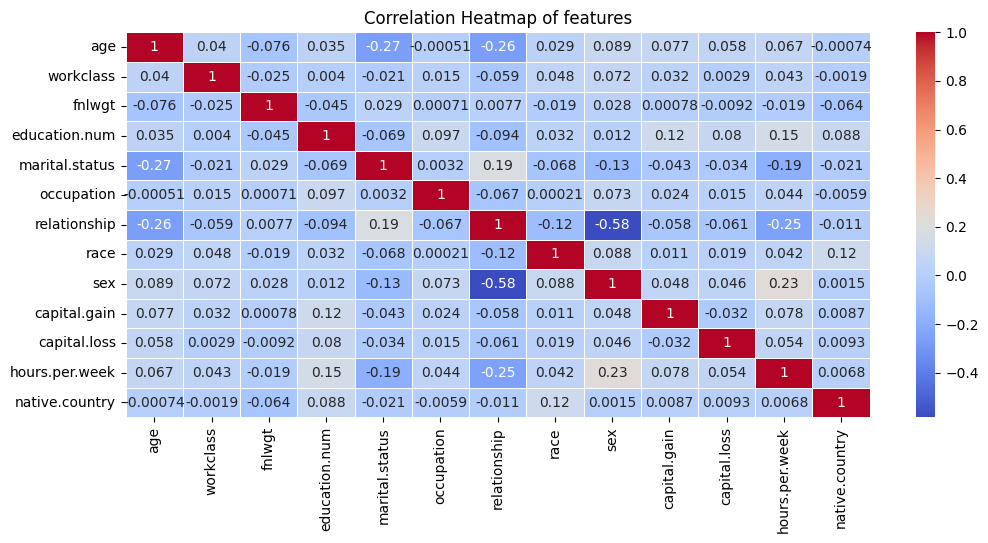

In [14]:
# Find out the correlations among the features within the dataset
X = df.drop("income", axis=1)

plt.figure(figsize=(12, 5))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of features')
plt.show()

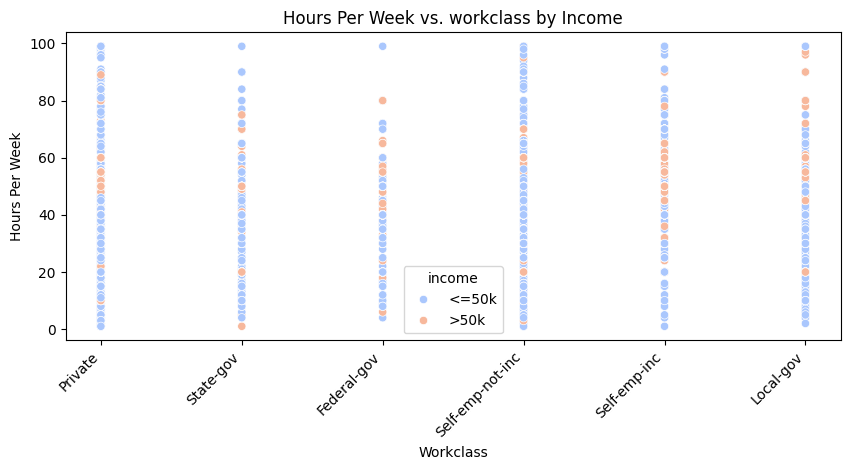

In [15]:
workclass_mapping = {
    0: "Federal-gov", 1: "Local-gov", 2: "Never-worked",  3: "Private", 4: "Self-emp-inc",
    5: "Self-emp-not-inc", 6: "State-gov", 7: "Without-pay",   
}

df_workclass = df.copy()
df_workclass["workclass_text"] = df_workclass["workclass"].map(workclass_mapping)

plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_workclass, x="workclass_text", y="hours.per.week", hue=df["income"].map({0: "<=50k", 1: ">50k"}), palette="coolwarm")
plt.title("Hours Per Week vs. workclass by Income")
plt.xlabel("Workclass")
plt.ylabel("Hours Per Week")
plt.xticks(rotation=45, ha="right")
plt.show()

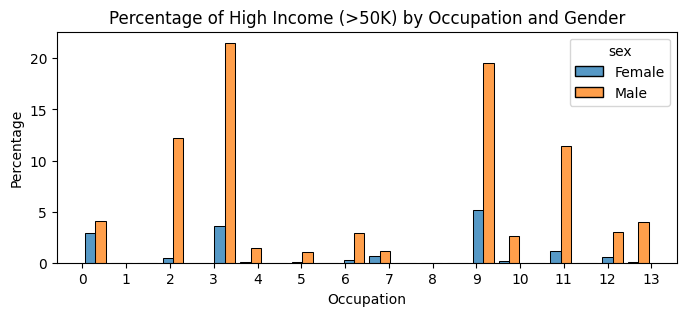

In [16]:
# Find gender based distribution for the income
df_income_50k = df[df["income"] == 1]

plt.figure(figsize=(8, 3))
sns.histplot(data=df_income_50k, x=df_income_50k["occupation"], hue=df_income_50k["sex"].map({0: "Female", 1: "Male"}), stat="percent", shrink=0.8, multiple="dodge")
plt.title('Percentage of High Income (>50K) by Occupation and Gender')
plt.ylabel('Percentage')
plt.xlabel('Occupation')
plt.xticks(ticks=df_income_50k["occupation"].unique())
plt.show()

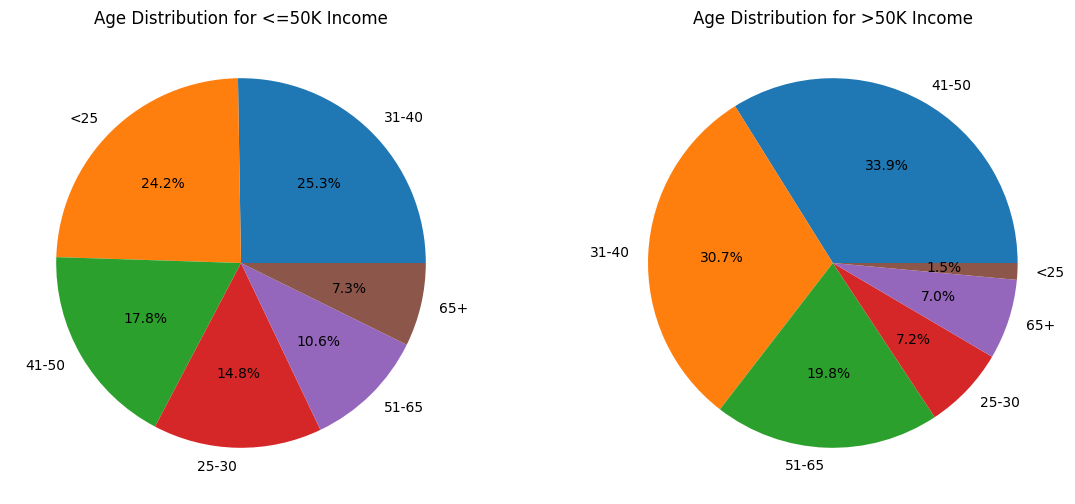

In [17]:
# Find out age distributions for the income within the dataset
age_group_bins = [17, 25, 30, 40, 50, 60, 90]
age_labels = ["<25", "25-30", "31-40", "41-50", "51-65", "65+"]

# Create a new attribute to fill in the age range for the individuals
df_age_groups = df.copy()
df_age_groups["age_group"] = pd.cut(df["age"], bins=age_group_bins, labels=age_labels)

# Find the age ditribution to plot on a pie chart
df_age_dist_lt_50k = df_age_groups[df_age_groups["income"] == 0]["age_group"].value_counts()
df_age_dist_gt_50k = df_age_groups[df_age_groups["income"] == 1]["age_group"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot subplots togther for age distribution
axes[0].pie(df_age_dist_lt_50k, labels=df_age_dist_lt_50k.index, autopct="%1.1f%%")
axes[0].set_title('Age Distribution for <=50K Income')
axes[1].pie(df_age_dist_gt_50k, labels=df_age_dist_gt_50k.index, autopct="%1.1f%%")
axes[1].set_title('Age Distribution for >50K Income')

plt.show()

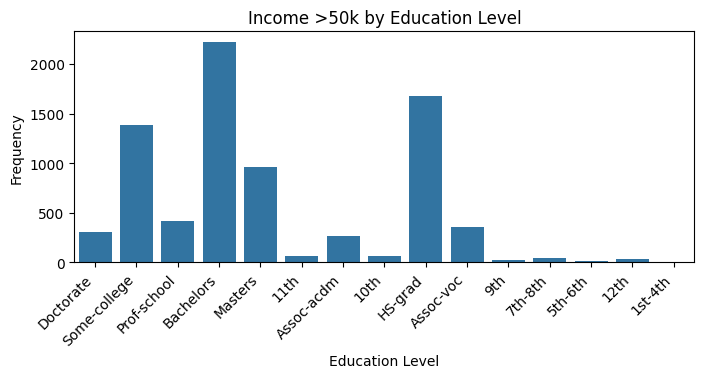

In [18]:
# Find education distribution based on income 
education_mapping = { 
    1: "Preschool", 2: "1st-4th", 3: "5th-6th", 4: "7th-8th", 5: "9th", 6: "10th", 7: "11th", 8: "12th",
    9: "HS-grad", 10: "Some-college", 11: "Assoc-voc", 12: "Assoc-acdm", 13: "Bachelors", 14: "Masters",
    15: "Prof-school", 16: "Doctorate"
}

df_education = df.copy()
df_education["education"] = df["education.num"].map(education_mapping)

plt.figure(figsize=(8, 3))
sns.countplot(x="education", data=df_education[df_education["income"] == 1])
plt.title("Income >50k by Education Level")
plt.xlabel("Education Level")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.show()


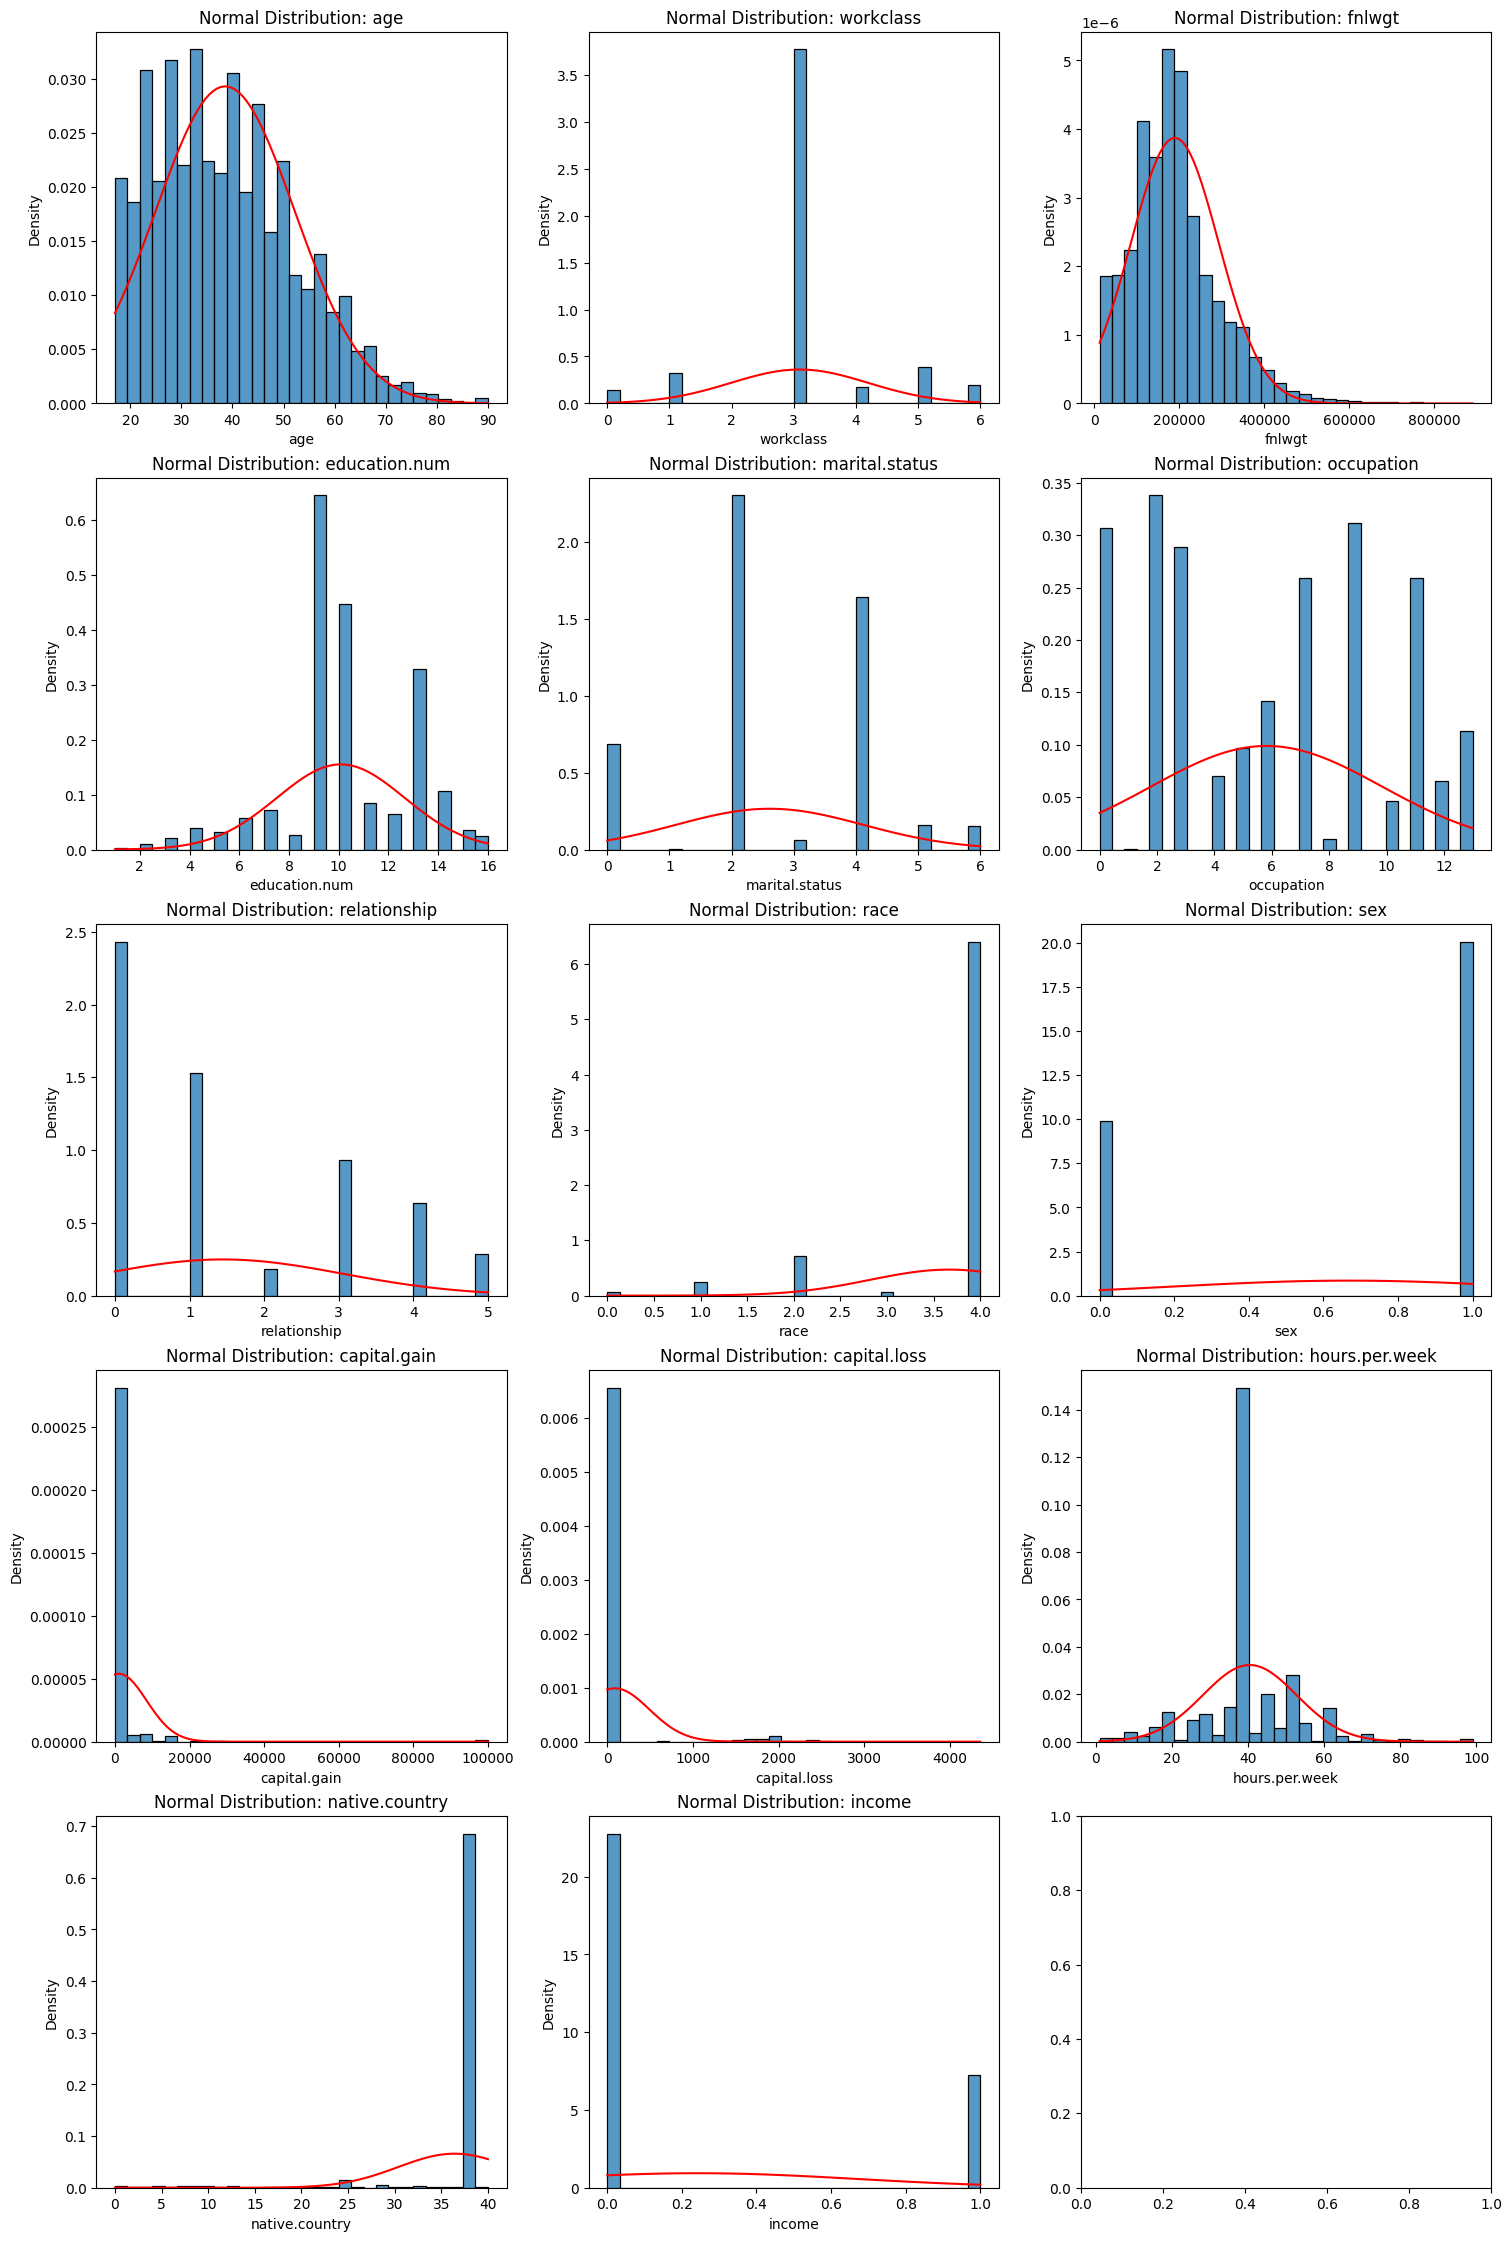

In [19]:
# Subplots for fitting normal distribution with three plots per row

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 28))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    data = df[col]
    mean, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    pdf = norm.pdf(x, mean, std)

    # Plot the distribution for each attribute's hist plot
    sns.histplot(data, kde=False, bins=30, stat="density", ax=axes[i])
    axes[i].plot(x, pdf, color="red")
    axes[i].set_title("Normal Distribution: " + str(col))
plt.show()


<b>Checking for any data imbalance in the dataset</b>

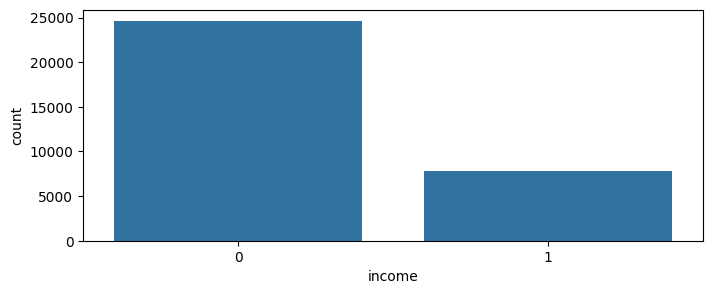

In [20]:
# The following plot drawn shows the imbalance within the dataset.
# Majority of the data is taken by the class label "<=50k" 
# and the minority class label here is ">50k"

plt.figure(figsize=(8,3))
sns.countplot(x="income", data=df)
plt.show()

<b>Sampling techniques for handling class imbalance</b>

In [21]:
# Fix class imbalances using SMOTE and TOMEK Links
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Results before applying any sampling techniques")
print("Data points in majority class: ", len(y[y == 0]))
print("Data points in minority class: ", len(y[y== 1]))
print("--------------")

# Apply SMOTE: Over Sampling
smote_over_sampler = SMOTE(random_state=0)
smote_x_resampled, smote_y_resampled = smote_over_sampler.fit_resample(X_train, y_train)
print("Results after applying SMOTE (over-sampling) technique")
print("Data points in majority class: ", len(smote_y_resampled[smote_y_resampled == 0]))
print("Data points in minority class: ", len(smote_y_resampled[smote_y_resampled== 1]))
print("--------------")


# Apply TOKEK Links: Under Sampling
tomek = TomekLinks(sampling_strategy='majority')
tomek_x_resampled, tomek_y_resampled = tomek.fit_resample(X_train, y_train)
print("Results after applying TOMEK Links (under-sampling) technique")
print("Data points in majority class: ", len(tomek_y_resampled[tomek_y_resampled == 0]))
print("Data points in minority class: ", len(tomek_y_resampled[tomek_y_resampled == 1]))
print("--------------")

Results before applying any sampling techniques
Data points in majority class:  24655
Data points in minority class:  7832
--------------
Results after applying SMOTE (over-sampling) technique
Data points in majority class:  19714
Data points in minority class:  19714
--------------
Results after applying TOMEK Links (under-sampling) technique
Data points in majority class:  17716
Data points in minority class:  6275
--------------


In [25]:
# KNN Algorithm on the three dataframes
def get_results(train_features, train_label, test_features, test_label, metric):
    output = []

    # For 10 different values of k
    for k in range(1, 5):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(train_features, train_label)
        y_pred = knn.predict(test_features)

        output.append([accuracy_score(test_label, y_pred), precision_score(test_label, y_pred),
                       recall_score(test_label, y_pred), f1_score(test_label, y_pred), roc_auc_score(test_label, y_pred)])  

    return output 

# Original Dataframe
X = df.drop("income", axis=1)
y = df["income"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Results of KNN for original Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "manhattan"))
print(get_results(X_train, y_train, X_test, y_test, "euclidean"))
print("---------------------------")

# Undersampled Dataframe
scaler = StandardScaler()
tomek_x_resampled = scaler.fit_transform(tomek_x_resampled)
X_train, X_test, y_train, y_test = train_test_split(tomek_x_resampled, tomek_y_resampled, test_size=0.2, random_state=42)
print("Results of KNN for undersampled Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "manhattan"))
print(get_results(X_train, y_train, X_test, y_test, "euclidean"))
print("---------------------------")

# Oversampled Dataframe
scaler = StandardScaler()
smote_x_resampled = scaler.fit_transform(smote_x_resampled)
X_train, X_test, y_train, y_test = train_test_split(smote_x_resampled, smote_y_resampled, test_size=0.2, random_state=42)
print("Results of KNN for oversampled Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "manhattan"))
print(get_results(X_train, y_train, X_test, y_test, "euclidean"))
print("---------------------------")


Results of KNN for original Dataframe
[[0.7982456140350878, np.float64(0.5798701298701299), np.float64(0.573538856775851), np.float64(0.5766871165644172), np.float64(0.7212968519863874)], [0.8151738996614343, np.float64(0.6977777777777778), np.float64(0.40333975594091204), np.float64(0.5111925111925112), np.float64(0.6741450854183411)], [0.8200984918436443, np.float64(0.6368124118476728), np.float64(0.5799614643545279), np.float64(0.6070588235294118), np.float64(0.7378657756907228)], [0.8230224684518314, np.float64(0.6958614051973051), np.float64(0.464354527938343), np.float64(0.5570107858243452), np.float64(0.7001999314453908)]]
[[0.7959372114496768, np.float64(0.5754408883082952), np.float64(0.5658317276814386), np.float64(0.5705958549222798), np.float64(0.7171397051683858)], [0.8096337334564482, np.float64(0.6769911504424779), np.float64(0.3930635838150289), np.float64(0.4973587972368956), np.float64(0.666983117550097)], [0.819636811326562, np.float64(0.6339596381350034), np.float64

In [30]:
# Decision Tree Algorithm on the three dataframes
def get_results(train_features, train_label, test_features, test_label, metric):
    clf = DecisionTreeClassifier(random_state=42, criterion=metric)
    clf.fit(train_features, train_label)
    y_pred = clf.predict(test_features)
    return [accuracy_score(test_label, y_pred), precision_score(test_label, y_pred),
            recall_score(test_label, y_pred), f1_score(test_label, y_pred), roc_auc_score(test_label, y_pred)]

# Original Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Results of Decision Tree for original Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")

# Undersampled Dataframe
X_train, X_test, y_train, y_test = train_test_split(tomek_x_resampled, tomek_y_resampled, test_size=0.2, random_state=42)
print("Results of Decision Tree for undersampled Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")


# Oversampled Dataframe
print("Results of Decision Tree for oversampled Dataframe")
X_train, X_test, y_train, y_test = train_test_split(smote_x_resampled, smote_y_resampled, test_size=0.2, random_state=42)
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")



Results of Decision Tree for original Dataframe
[0.8110187750076947, np.float64(0.6056518946692357), np.float64(0.6056518946692357), np.float64(0.6056518946692357), np.float64(0.7406927759118289)]
[0.8176361957525392, np.float64(0.6178707224334601), np.float64(0.626204238921002), np.float64(0.6220095693779905), np.float64(0.7520820830306285)]
[0.8176361957525392, np.float64(0.6178707224334601), np.float64(0.626204238921002), np.float64(0.6220095693779905), np.float64(0.7520820830306285)]
---------------------------
Results of Decision Tree for undersampled Dataframe
[0.8162117107730777, np.float64(0.6434169278996865), np.float64(0.6578525641025641), np.float64(0.650554675118859), np.float64(0.7648598218992122)]
[0.8089185246926442, np.float64(0.6306235201262825), np.float64(0.6402243589743589), np.float64(0.6353876739562624), np.float64(0.7542152490450506)]
[0.8089185246926442, np.float64(0.6306235201262825), np.float64(0.6402243589743589), np.float64(0.6353876739562624), np.float64(0.

In [27]:
# Random Forest  Algorithm on the three dataframes
def get_results(train_features, train_label, test_features, test_label, metric):
    clf = RandomForestClassifier(random_state=42, criterion=metric)
    clf.fit(train_features, train_label)
    y_pred = clf.predict(test_features)
    return [accuracy_score(test_label, y_pred), precision_score(test_label, y_pred),
            recall_score(test_label, y_pred), f1_score(test_label, y_pred), roc_auc_score(test_label, y_pred)]

# Original Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Results of Random Forest for original Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")

# Undersampled Dataframe
X_train, X_test, y_train, y_test = train_test_split(tomek_x_resampled, tomek_y_resampled, test_size=0.2, random_state=42)
print("Results of Random Forest for undersampled Dataframe")
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")


# Oversampled Dataframe
print("Results of Random Forest for oversampled Dataframe")
X_train, X_test, y_train, y_test = train_test_split(smote_x_resampled, smote_y_resampled, test_size=0.2, random_state=42)
print(get_results(X_train, y_train, X_test, y_test, "gini"))
print(get_results(X_train, y_train, X_test, y_test, "entropy"))
print(get_results(X_train, y_train, X_test, y_test, "log_loss"))
print("---------------------------")



Results of Random Forest for original Dataframe
[0.8539550630963373, np.float64(0.729260935143288), np.float64(0.6210661528580603), np.float64(0.6708289975719737), np.float64(0.7742043980238491)]
[0.8545706371191135, np.float64(0.7314674735249622), np.float64(0.6210661528580603), np.float64(0.671761028134769), np.float64(0.7746091743849095)]
[0.8545706371191135, np.float64(0.7314674735249622), np.float64(0.6210661528580603), np.float64(0.671761028134769), np.float64(0.7746091743849095)]
---------------------------
Results of Random Forest for undersampled Dataframe
[0.8608043342362992, np.float64(0.7675276752767528), np.float64(0.6666666666666666), np.float64(0.7135506003430532), np.float64(0.7978503707875715)]
[0.8578870598041258, np.float64(0.7568058076225045), np.float64(0.6682692307692307), np.float64(0.7097872340425532), np.float64(0.7963987663280117)]
[0.8578870598041258, np.float64(0.7568058076225045), np.float64(0.6682692307692307), np.float64(0.7097872340425532), np.float64(0.